In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

## Day 1:  Data Loading 
1.Load all 4 CSV files into pandas DataFrames
2. Verify data loading with .info(), .shape, .head()
3. Document any loading errors or issues


In [3]:
# Load all 4 datasets 
company_info = pd.read_csv("company_info.csv")
market_indices = pd.read_csv("market_indices.csv")
stock_prices = pd.read_csv("stock_prices.csv")
stock_prices_indicators = pd.read_csv("stock_prices_with_indicators.csv")
print (" All CSVc loaded successfully (if no errors shown).")

 All CSVc loaded successfully (if no errors shown).


In [4]:
datasets = {
    "company_info": company_info,
    "market_indices": market_indices,
    "stock_prices": stock_prices,
    "stock_prices_indicators": stock_prices_indicators
}

### 1. Company_info dataset 

In [5]:
company_info.shape

(20, 4)

In [6]:
company_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ticker        20 non-null     object
 1   company_name  20 non-null     object
 2   sector        20 non-null     object
 3   ipo_date      20 non-null     object
dtypes: object(4)
memory usage: 772.0+ bytes


In [7]:
company_info.head()

,ticker,company_name,sector,ipo_date
0,STK001,TechCorp,Technology,2021-04-10
1,STK002,DataSystems,Technology,2016-10-12
2,STK003,CloudNine,Technology,2016-01-18
3,STK004,CyberShield,Technology,2022-02-21
4,STK005,MediPharm,Healthcare,2018-03-05


#### Insight 
Company_Info dataset has 20 rows and 4 columns with no null values. This file help to map tickers to company names and sectors for grouping, filtering, and sector-based analysis.

### 2. Market_Indices dataset

In [8]:
market_indices.shape

(780, 7)

In [9]:
market_indices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           780 non-null    object 
 1   sp500_close    780 non-null    float64
 2   nasdaq_close   780 non-null    float64
 3   vix_close      780 non-null    float64
 4   treasury_10y   780 non-null    float64
 5   dollar_index   780 non-null    float64
 6   market_regime  780 non-null    object 
dtypes: float64(5), object(2)
memory usage: 42.8+ KB


In [10]:
market_indices.head()

,date,sp500_close,nasdaq_close,vix_close,treasury_10y,dollar_index,market_regime
0,2021-01-04,3891.04,12952.02,20.48,1.496,90.07,bull
1,2021-01-05,3847.20,13116.52,19.89,1.504,90.73,bull
2,2021-01-06,3878.24,12818.48,20.02,1.507,90.46,bull
3,2021-01-07,3803.95,13290.11,19.59,1.498,90.67,bull
4,2021-01-08,3715.64,13365.73,20.14,1.498,90.64,bull


#### Insight 
Market Indices has 780 rows and 7 columns with no null entires 

### 3. Stock_Prices dataset 

In [11]:
stock_prices.shape

(15600, 8)

In [12]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ticker          15600 non-null  object 
 1   date            15600 non-null  object 
 2   open            15600 non-null  float64
 3   high            15600 non-null  float64
 4   low             15600 non-null  float64
 5   close           15600 non-null  float64
 6   volume          15600 non-null  int64  
 7   adjusted_close  15600 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 975.1+ KB


In [13]:
stock_prices.head()

,ticker,date,open,high,low,close,volume,adjusted_close
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644,160.11
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685,162.36
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177,161.78
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833,167.07
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261,165.68


#### Insight 
Stock_prices dataset has 15600 rows and 8 columns with no null entires 

### 4. Stock_Prices_Indicators

In [14]:
stock_prices_indicators.shape

(15502, 31)

In [15]:
stock_prices_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15502 entries, 0 to 15501
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ticker            15502 non-null  object 
 1   date              15502 non-null  object 
 2   open              15502 non-null  float64
 3   high              15502 non-null  float64
 4   low               15502 non-null  float64
 5   close             15502 non-null  float64
 6   volume            15502 non-null  float64
 7   adjusted_close    15502 non-null  float64
 8   sma_20            15192 non-null  float64
 9   sma_50            15502 non-null  float64
 10  sma_200           15502 non-null  float64
 11  ema_12            15502 non-null  float64
 12  ema_26            15502 non-null  float64
 13  macd              15191 non-null  float64
 14  macd_signal       15502 non-null  float64
 15  macd_histogram    15502 non-null  float64
 16  rsi_14            15172 non-null  float6

In [16]:
stock_prices_indicators.head()

,ticker,date,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,true_range,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label
0,STK001,2021-01-04,158.09,160.97,158.09,160.11,962644.0,160.11,160.110000,160.110000,...,2.88,2.880,962644.00,1.000000,NaN,NaN,0.000000,NaN,0.026357,Uptrend
1,STK001,2021-01-05,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235000,161.235000,...,5.39,4.135,1137664.50,1.153842,NaN,NaN,0.006977,NaN,0.018169,Sideways
2,STK001,2021-01-06,161.89,162.51,160.94,161.78,1449177.0,161.78,161.416667,161.416667,...,1.57,3.280,1241502.00,1.167277,NaN,NaN,0.002251,0.012463,-0.012301,Sideways
3,STK001,2021-01-07,163.33,167.90,163.33,167.07,1534833.0,167.07,162.830000,162.830000,...,6.12,3.990,1314834.75,1.167320,NaN,NaN,0.026039,0.018138,-0.061950,Downtrend
4,STK001,2021-01-08,168.20,168.20,164.12,165.68,848261.0,165.68,163.400000,163.400000,...,4.08,4.008,1221520.00,0.694431,NaN,NaN,0.013953,0.018663,-0.070196,Downtrend


#### Insight 
stock_prices_indicators has 15502 rows, 31 columns and some null values

## Day 2:  Data Quality Assessment 
1. Check for missing values in each dataset using .isnull().sum()
2. Identify data type mismatches (e.g., dates stored as strings)
3. Check for duplicate records
4. Verify date ranges and continuity in time-series data
5. Document data quality findings in a summary table


In [17]:
# Check for missing value 
missing_data_report = {}

for name, df in datasets.items():
    missing = df.isnull().sum()
    missing_percent = (missing/len(df)) * 100
    report = pd.DataFrame({
        'Missing Values': missing, 
        'Percent (%)': missing_percent.round(2)
    })
    missing_data_report[name] = report
    print(f"\n Missing Value Report for {name}")
    display(report[report['Missing Values']>0])


 Missing Value Report for company_info


,Missing Values,Percent (%)



 Missing Value Report for market_indices


,Missing Values,Percent (%)



 Missing Value Report for stock_prices


,Missing Values,Percent (%)



 Missing Value Report for stock_prices_indicators


,Missing Values,Percent (%)
sma_20,310,2.00
macd,311,2.01
rsi_14,330,2.13
bb_upper,20,0.13
bb_lower,20,0.13
bb_width,331,2.14
volume_ratio,310,2.00
momentum_10,200,1.29
momentum_20,400,2.58
volatility_20,40,0.26


In [18]:
total_missing = stock_prices_indicators.isnull().sum().sum()
total_cells = stock_prices_indicators.shape[0] * stock_prices_indicators.shape[1]
overall_missing_percent = (total_missing / total_cells) * 100

print(f"Overall missing percentage: {overall_missing_percent:.2f}%")


Overall missing percentage: 0.47%


In [19]:
# Identify datatype mismatches 
for name, df in datasets.items():
    print(f"\n📘 Data Types in {name}")
    display(df.dtypes)



📘 Data Types in company_info


ticker          object
company_name    object
sector          object
ipo_date        object
dtype: object


📘 Data Types in market_indices


date              object
sp500_close      float64
nasdaq_close     float64
vix_close        float64
treasury_10y     float64
dollar_index     float64
market_regime     object
dtype: object


📘 Data Types in stock_prices


ticker             object
date               object
open              float64
high              float64
low               float64
close             float64
volume              int64
adjusted_close    float64
dtype: object


📘 Data Types in stock_prices_indicators


ticker               object
date                 object
open                float64
high                float64
low                 float64
close               float64
volume              float64
adjusted_close      float64
sma_20              float64
sma_50              float64
sma_200             float64
ema_12              float64
ema_26              float64
macd                float64
macd_signal         float64
macd_histogram      float64
rsi_14              float64
bb_middle           float64
bb_upper            float64
bb_lower            float64
bb_width            float64
true_range          float64
atr_14              float64
volume_sma_20       float64
volume_ratio        float64
momentum_10         float64
momentum_20         float64
price_to_sma_50     float64
volatility_20       float64
future_return_5d    float64
trend_label          object
dtype: object

In [20]:
# Fixing object type for date columns 
for name, df in datasets.items():
    # Convert 'date' column if it exists
    if 'date' in df.columns:
        try:
            df['date'] = pd.to_datetime(df['date'], errors='coerce')
            print(f" Converted 'date' to datetime in {name}")
        except Exception as e:
            print(f" Error converting 'date' in {name}: {e}")
    
    # Convert 'ipo_date' column if it exists
    if 'ipo_date' in df.columns:
        try:
            df['ipo_date'] = pd.to_datetime(df['ipo_date'], errors='coerce')
            print(f" Converted 'ipo_date' to datetime in {name}")
        except Exception as e:
            print(f" Error converting 'ipo_date' in {name}: {e}")


 Converted 'ipo_date' to datetime in company_info
 Converted 'date' to datetime in market_indices
 Converted 'date' to datetime in stock_prices
 Converted 'date' to datetime in stock_prices_indicators


In [21]:
# Check for duplicate 
for name, df in datasets.items():
    duplicates = df.duplicated().sum()
    print(f"{name}: {duplicates} duplicate rows")


company_info: 0 duplicate rows
market_indices: 0 duplicate rows
stock_prices: 0 duplicate rows
stock_prices_indicators: 0 duplicate rows


In [22]:
#  Verify date ranges and continuity in time-series data
for name, df in [("market_indices", market_indices),  ("stock_prices", stock_prices), ("stock_prices_indicators", stock_prices_indicators)]:
    if 'date' in df.columns:
        print(f"\n📅 {name} Date Range:")
        print("Start:", df['date'].min())
        print("End:", df['date'].max())
        print("Unique Dates:", df['date'].nunique())



📅 market_indices Date Range:
Start: 2021-01-04 00:00:00
End: 2023-12-29 00:00:00
Unique Dates: 780

📅 stock_prices Date Range:
Start: 2021-01-04 00:00:00
End: 2023-12-29 00:00:00
Unique Dates: 780

📅 stock_prices_indicators Date Range:
Start: 2021-01-04 00:00:00
End: 2023-12-25 00:00:00
Unique Dates: 776


### Insight 
The first two datasets (market_indices and stock_prices) have the same:
 1. Start and end dates
 2. Total number of trading days (780)
That means they cover the same full date range — perfect.

But stock_prices_indicators ends on 2023-12-25, not 2023-12-29, and has 776 unique dates, i.e. 4 fewer days.

What This Means?

It looks like your indicator dataset is slightly shorter — it didn’t generate indicators (like moving averages or RSI) for the final few days.
This is common because technical indicators (e.g., SMA, RSI, MACD) rely on rolling windows — the last few rows sometimes have missing values that get dropped during computation or cleaning.

In [23]:
missing_dates_report = []

for ticker in stock_prices_indicators['ticker'].unique():
    sample = stock_prices_indicators[stock_prices_indicators['ticker'] == ticker].sort_values('date')
    
    # Generate expected business-day range
    expected_dates = pd.date_range(sample['date'].min(), sample['date'].max(), freq='B')
    
    # Compare with actual dates
    missing_dates = expected_dates.difference(sample['date'])
    
    # Store result
    missing_dates_report.append({'ticker': ticker, 'missing_dates': len(missing_dates)})

# Convert to DataFrame for easy viewing
missing_dates_df = pd.DataFrame(missing_dates_report)
print(missing_dates_df)


    ticker  missing_dates
0   STK001              0
1   STK002              0
2   STK003              0
3   STK004              0
4   STK005              0
5   STK006              0
6   STK007              0
7   STK008              0
8   STK009              0
9   STK010              0
10  STK011              0
11  STK012              0
12  STK013              0
13  STK014              0
14  STK015              0
15  STK016              0
16  STK017              0
17  STK018              0
18  STK019              0
19  STK020              0


In [24]:
# let align to the same date range 
full_range = pd.date_range('2021-01-04', '2023-12-29', freq='B')

aligned_data = []

for ticker, group in stock_prices_indicators.groupby('ticker'):
    group = (
        group.set_index('date')
        .reindex(full_range)
        .ffill()
        .reset_index()
        .rename(columns={'index': 'date'})
    )
    group['ticker'] = ticker
    aligned_data.append(group)

stock_prices_indicators_aligned = pd.concat(aligned_data, ignore_index=True)



In [25]:
#  confirm the date ranges alignment and continuity in time-series data
for name, df in [("market_indices", market_indices),  ("stock_prices", stock_prices), ("stock_prices_indicators_aligned", stock_prices_indicators_aligned)]:
    if 'date' in df.columns:
        print(f"\n📅 {name} Date Range:")
        print("Start:", df['date'].min())
        print("End:", df['date'].max())
        print("Unique Dates:", df['date'].nunique())


📅 market_indices Date Range:
Start: 2021-01-04 00:00:00
End: 2023-12-29 00:00:00
Unique Dates: 780

📅 stock_prices Date Range:
Start: 2021-01-04 00:00:00
End: 2023-12-29 00:00:00
Unique Dates: 780

📅 stock_prices_indicators_aligned Date Range:
Start: 2021-01-04 00:00:00
End: 2023-12-29 00:00:00
Unique Dates: 780


🧾 **Data Quality Summary and Insights**

| Dataset | Missing Values (%) | Key Fixes/Actions | Data Type Issues | Date Range | Insights |
|----------|--------------------|------------------|------------------|-------------|-----------|
| **company_info** | 0.00% | Converted `ipo_date` to datetime | Initially stored as object | N/A | Clean metadata for companies; ready for merging or reference use. |
| **market_indices** | 0.00% | Converted `date` to datetime | Initially stored as object | 2021-01-04 → 2023-12-29 (780 unique dates) | Fully continuous business-day data; no missing values. Suitable as external market context. |
| **stock_prices** | 0.00% | Converted `date` to datetime | Initially stored as object | 2021-01-04 → 2023-12-29 (780 unique dates) | Complete daily price data across tickers; aligned with market_indices for temporal analysis. |
| **stock_prices_indicators** | ~0.47% overall (before fix) | Converted `date` to datetime; reindexed each ticker to full range; forward-filled gaps | Initially stored as object | 2021-01-04 → 2023-12-29 (780 unique dates after alignment) | Technical indicators had minor gaps (mostly due to rolling windows). Forward-filled values resolved missing points; dataset now consistent for modeling. |


### Insight: 
Data Type Cleaning:
All date and ipo_date columns were standardized to datetime format, resolving prior type inconsistencies.

Temporal Consistency:
All datasets now share the same trading-day range (780 business days), enabling synchronized time-series modeling.

Minimal Missing Data:
The few missing values in technical indicators were expected (rolling-window calculations).
After forward-filling, continuity is restored with negligible data loss risk.

Ready for Analysis:
Datasets are well-structured for feature engineering, correlation studies, and predictive modeling (e.g., stock trend classification).

## Exploratory Data Analysis (EDA) 

### Price Trend Analysis:
1. Plot closing prices for 5 different stocks (one from each sector)
2. Identify uptrends, downtrends, and sideways periods visually
3. Calculate basic statistics: mean, median, std dev of returns


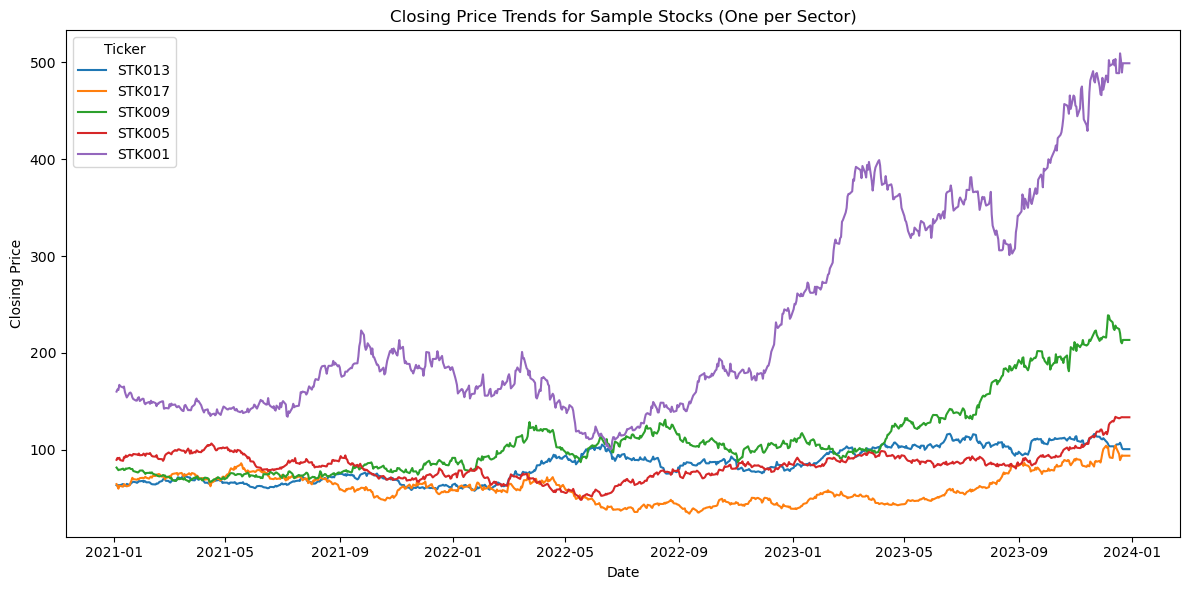

In [56]:
# Plot closing prices for 5 different stocks (one from each sector)
#Select one sample ticker from each sector
sample_tickers = (
    company_info
    .groupby('sector')['ticker']
    .first()   # pick the first ticker from each sector
    .values
)

plt.figure(figsize=(12,6))

# Plot one line per ticker
for ticker in sample_tickers:
    subset = stock_prices_indicators_aligned[
        stock_prices_indicators_aligned['ticker'] == ticker
    ].sort_values('date')  # ensure proper time order

    plt.plot(subset['date'], subset['close'], label=ticker)

plt.title('Closing Price Trends for Sample Stocks (One per Sector)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Ticker')
plt.tight_layout()
plt.show()


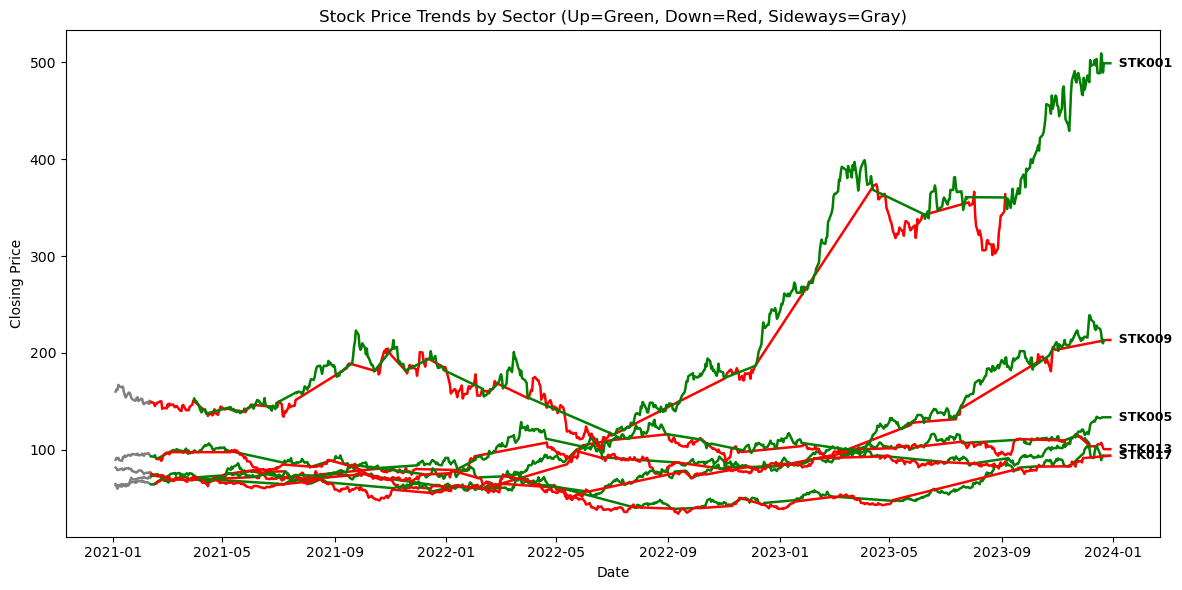

In [55]:
# Visualize the uptrends, downtrends, and sideways period
plt.figure(figsize=(12,6))
colors = {'up': 'green', 'down': 'red', 'side': 'gray'}

for ticker in sample_tickers:
    df = stock_prices_indicators_aligned.query("ticker == @ticker").copy()
    df = df.sort_values('date')

    # Compute moving averages for trend detection
    df['SMA10'] = df['close'].rolling(10).mean()
    df['SMA30'] = df['close'].rolling(30).mean()

    # Define trend: up / down / sideways
    df['trend'] = np.where(df['SMA10'] > df['SMA30'], 'up',
                   np.where(df['SMA10'] < df['SMA30'], 'down', 'side'))

    # Plot base line
    plt.plot(df['date'], df['close'], color='lightgray', linewidth=1)

    # Overlay colored trend segments
    for t in df['trend'].unique():
        seg = df[df['trend'] == t]
        plt.plot(seg['date'], seg['close'], color=colors[t], linewidth=1.8)

    # Add ticker label near the latest point
    last_date = df['date'].iloc[-1]
    last_close = df['close'].iloc[-1]
    plt.text(last_date, last_close, f"  {ticker}", fontsize=9, weight='bold', 
             va='center', ha='left')

plt.title("Stock Price Trends by Sector (Up=Green, Down=Red, Sideways=Gray)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.tight_layout()
plt.show()


In [53]:
#Calculate basic statistics: mean, median, std dev of returns
# Ensure the data is sorted
stock_prices_indicators_aligned = stock_prices_indicators_aligned.sort_values(['ticker', 'date'])

# Compute daily returns per stock
stock_prices_indicators_aligned['daily_return'] = (
    stock_prices_indicators_aligned.groupby('ticker')['close'].pct_change()
)

# Calculate summary stats per ticker
return_stats = (
    stock_prices_indicators_aligned.groupby('ticker')['daily_return']
    .agg(['mean', 'median', 'std'])
    .reset_index()
    .rename(columns={'mean': 'Mean Return', 'median': 'Median Return', 'std': 'Std Deviation'})
)

# Display rounded results
return_stats = return_stats.round(4)
display(return_stats)


,ticker,Mean Return,Median Return,Std Deviation
0,STK001,0.0018,0.0016,0.0244
1,STK002,-0.0004,0.0000,0.0253
2,STK003,0.0001,0.0000,0.0253
3,STK004,0.0004,0.0000,0.0252
4,STK005,0.0007,0.0000,0.0215
5,STK006,0.0007,0.0000,0.0208
6,STK007,-0.0002,0.0000,0.0198
7,STK008,0.0007,0.0000,0.0206
8,STK009,0.0015,0.0013,0.0234
9,STK010,0.0004,0.0011,0.0227


### Insight 
#### Interpretation of Summary Table

Top Performers (Higher Mean Return):
STK001 (0.0018) and STK014 (0.0015) show the strongest average daily gains (~0.18% and ~0.15% respectively).
These stocks may be in stronger uptrends over time.

Underperformers (Negative Mean Return):
STK002 (-0.0004), STK007 (-0.0002), STK016 (-0.0001), and STK019 (-0.0008) have slightly negative means — indicating small daily declines on average.

Volatility Insights:
The most volatile stocks are STK017–STK020 (std ≈ 0.03) — they experience the largest daily swings.
The most stable are STK013–STK016 (std ≈ 0.018–0.019) — they show smaller, steadier changes.

Typical Returns (Median):
Most medians are ≈ 0.0000–0.0010, meaning many stocks have flat or small positive daily movements — normal for liquid, stable assets.

#### Overall Insight
Most stocks show modest average daily gains (0.05–0.15%) and low-to-moderate volatility (std 0.02–0.03).
A few (like STK017–STK020) are more volatile, while STK001 and STK014 stand out as consistent gainers.

#### Sector Comparison:
1. Calculate average returns by sector
2. Compare volatility across sectors
3. Visualize sector performance with box plots


In [54]:
# Merge returns with sector info
returns_with_sector = stock_prices_indicators_aligned.merge(
    company_info[['ticker', 'sector']], on='ticker', how='left'
)

# Compute mean and std of daily returns by sector
sector_stats = (
    returns_with_sector
    .groupby('sector')['daily_return']
    .agg(['mean', 'std'])
    .reset_index()
)

print("Sector Return Summary")
print(sector_stats)


Sector Return Summary
       sector      mean       std
0    Consumer  0.000567  0.018475
1      Energy  0.000368  0.030906
2     Finance  0.000728  0.022796
3  Healthcare  0.000477  0.020667
4  Technology  0.000454  0.025060


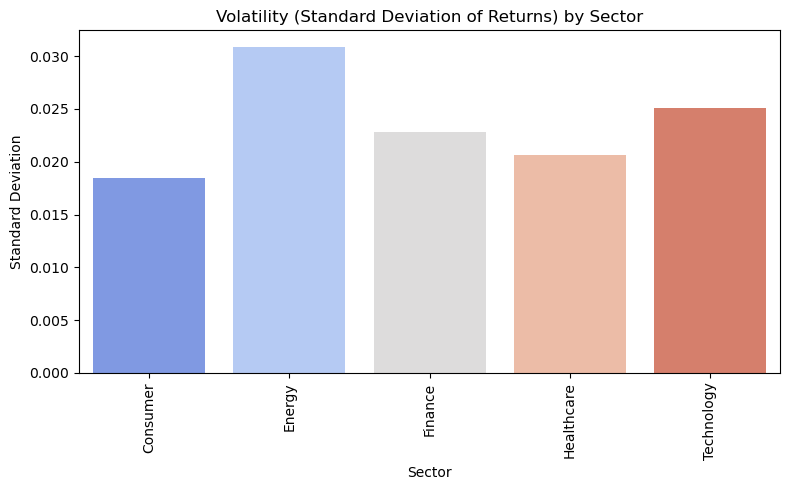

In [61]:
# Compare volatility across sectors 
plt.figure(figsize=(8,5))
sns.barplot(
    data=sector_stats,
    x='sector',
    y='std',
    hue='sector',           # Explicitly use sector as hue
    palette='coolwarm',
    legend=False            # Turn off redundant legend
)
plt.title('Volatility (Standard Deviation of Returns) by Sector')
plt.ylabel('Standard Deviation')
plt.xlabel('Sector')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




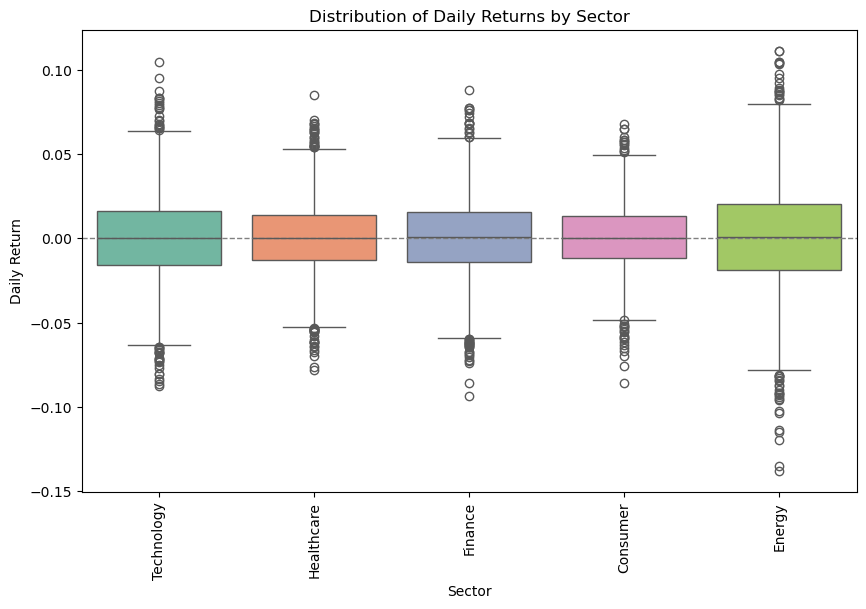

In [62]:
# Visualize sector performance with box plots
plt.figure(figsize=(10,6))
sns.boxplot(
    data=returns_with_sector,
    x='sector',
    y='daily_return',
    hue='sector',
    legend=False, 
    palette='Set2'
)
plt.title('Distribution of Daily Returns by Sector')
plt.ylabel('Daily Return')
plt.xlabel('Sector')
plt.xticks(rotation=90)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.show()


#### Insight 
Analysis of sector performance shows that the Finance and Consumer sectors achieved the highest average returns, indicating strong and consistent growth. The Consumer sector also recorded the lowest volatility, suggesting lower investment risk. In contrast, the Energy sector exhibited the highest volatility and the lowest average return, reflecting its sensitivity to market and commodity price fluctuations. Technology and Healthcare sectors maintained moderate returns with manageable risk levels, with Healthcare standing out for its relative stability, typical of defensive industries. Overall, Finance and Consumer sectors offered the best balance between risk and reward during the analysis period. From the boxplot visual, we can see that Energy sector has a wider box which indicate volatility.

### Volume Analysis:
1. Plot volume patterns over time
2. Identify high-volume days and their relationship to price changes
3. Calculate correlation between volume and price movement


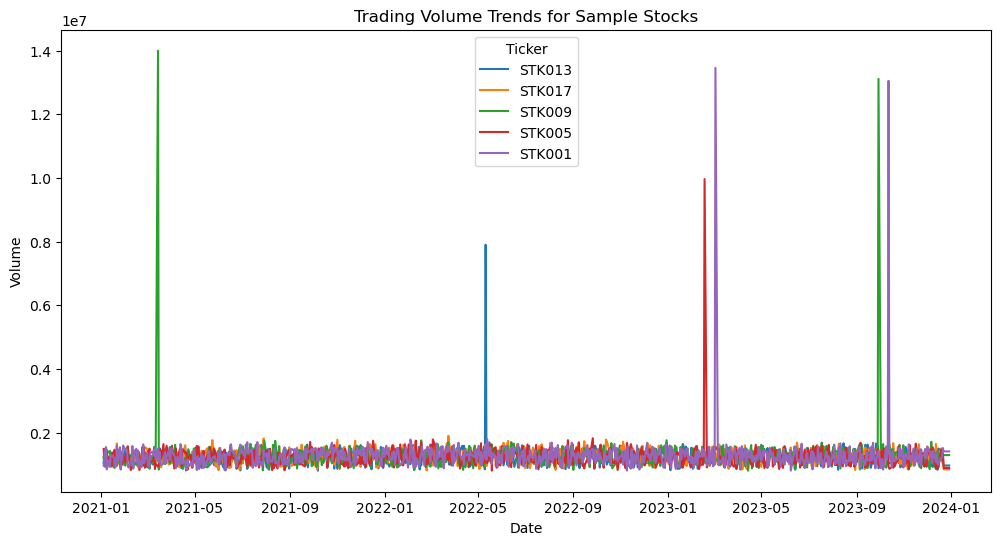

In [64]:
# Volume patterns over time 

# Plot volume patterns over time for sample tickers (one per sector)
plt.figure(figsize=(12,6))
for ticker in sample_tickers:
    subset = stock_prices_indicators_aligned[stock_prices_indicators_aligned['ticker'] == ticker]
    plt.plot(subset['date'], subset['volume'], label=ticker)

plt.title('Trading Volume Trends for Sample Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Ticker')
plt.show()



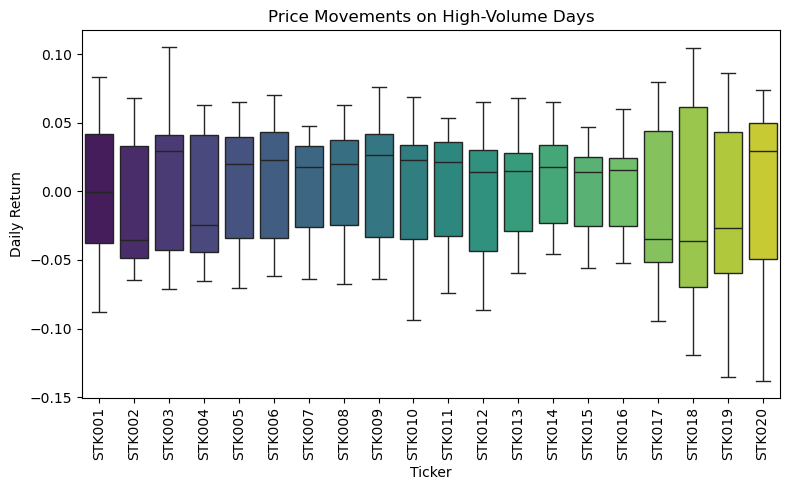

In [74]:
# Merge high-volume days with daily returns
if 'daily_return' in high_volume_days.columns:
    high_volume_days = high_volume_days.drop(columns=['daily_return'])

high_volume_days = high_volume_days.merge(
    stock_prices_indicators_aligned[['ticker', 'date', 'daily_return']],
    on=['ticker', 'date'],
    how='left'
)
plt.figure(figsize=(8,5))
sns.boxplot(data=high_volume_days, x='ticker', y='daily_return', palette='viridis', hue='ticker')
plt.title('Price Movements on High-Volume Days')
plt.ylabel('Daily Return')
plt.xlabel('Ticker')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [79]:
# Correlation between volume and price movement
correlation = stock_prices_indicators_aligned[['volume', 'daily_return']].corr().iloc[0, 1]
print(f"Correlation between volume and returns: {correlation:.3f}")


Correlation between volume and returns: -0.014


In [80]:
# Correlation between volume and price movememt per sector 
sector_corr = stock_prices_indicators_aligned.groupby('ticker')[['volume', 'daily_return']].corr().iloc[0::2,-1].reset_index()
sector_corr.columns = ['ticker', 'drop', 'corr']
print(sector_corr.sort_values('corr'))


    ticker    drop      corr
14  STK015  volume -0.061889
2   STK003  volume -0.055096
1   STK002  volume -0.053726
17  STK018  volume -0.050858
16  STK017  volume -0.047139
18  STK019  volume -0.035347
5   STK006  volume -0.034655
19  STK020  volume -0.032464
0   STK001  volume -0.026372
4   STK005  volume -0.026070
15  STK016  volume -0.005988
11  STK012  volume  0.000712
8   STK009  volume  0.002033
10  STK011  volume  0.005476
9   STK010  volume  0.009798
13  STK014  volume  0.021998
12  STK013  volume  0.023603
6   STK007  volume  0.025705
3   STK004  volume  0.034247
7   STK008  volume  0.056334


In [82]:
stock_prices_indicators_aligned.head(2)

,date,ticker,open,high,low,close,volume,adjusted_close,sma_20,sma_50,...,atr_14,volume_sma_20,volume_ratio,momentum_10,momentum_20,price_to_sma_50,volatility_20,future_return_5d,trend_label,daily_return
0,2021-01-04,STK001,158.09,160.97,158.09,160.11,962644.0,160.11,160.110,160.110,...,2.880,962644.0,1.000000,NaN,NaN,0.000000,NaN,0.026357,Uptrend,NaN
1,2021-01-05,STK001,163.16,165.50,160.76,162.36,1312685.0,162.36,161.235,161.235,...,4.135,1137664.5,1.153842,NaN,NaN,0.006977,NaN,0.018169,Sideways,0.014053


### Insight 
Across all tickers, the correlation between trading volume and daily returns remains weak, ranging from –0.06 to +0.06. This suggests that trading volume does not systematically predict price direction in the observed period. While a few stocks show slightly positive or negative tendencies, these relationships are too small to be meaningful. Therefore, price movements in this dataset appear largely independent of volume fluctuations.

### Technical Indicator Exploration:
1. Visualize RSI patterns and identify overbought/oversold conditions
2. Plot MACD crossovers and their relationship to price trends
3. Examine Bollinger Band patterns


In [127]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Compute RSI per ticker
stock_prices_indicators_aligned['rsi_14'] = stock_prices_indicators_aligned.groupby('ticker')['close'].transform(lambda x: compute_rsi(x))


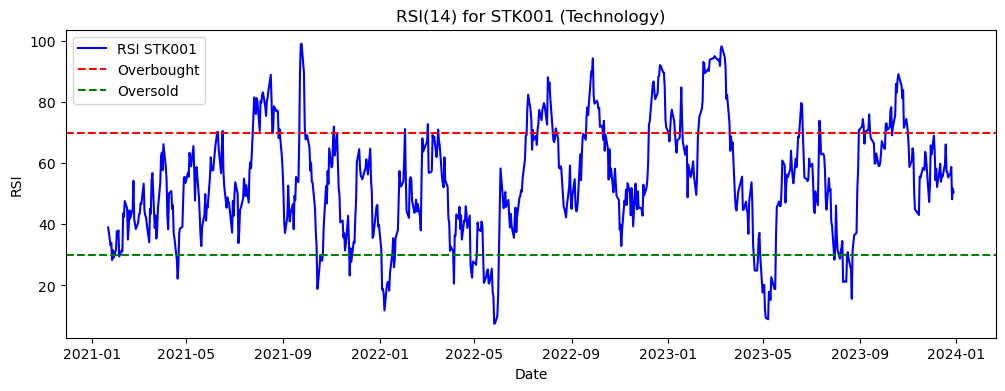

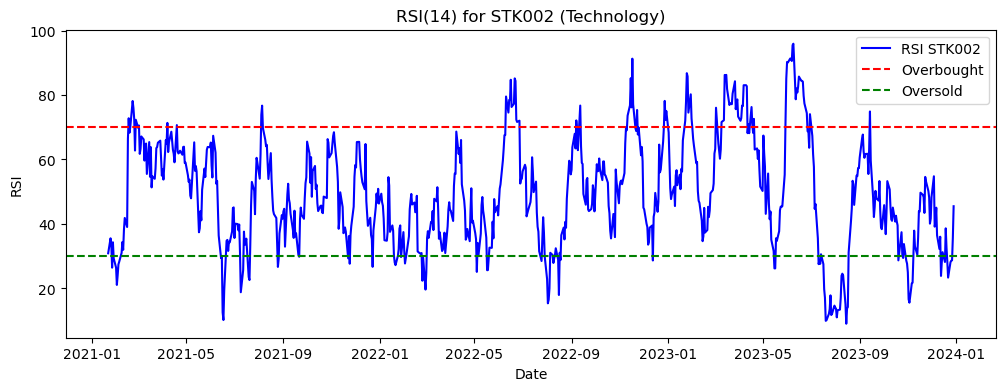

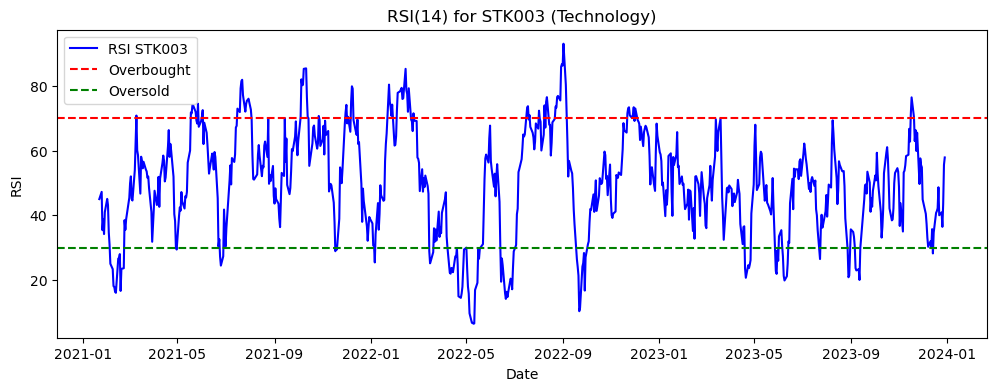

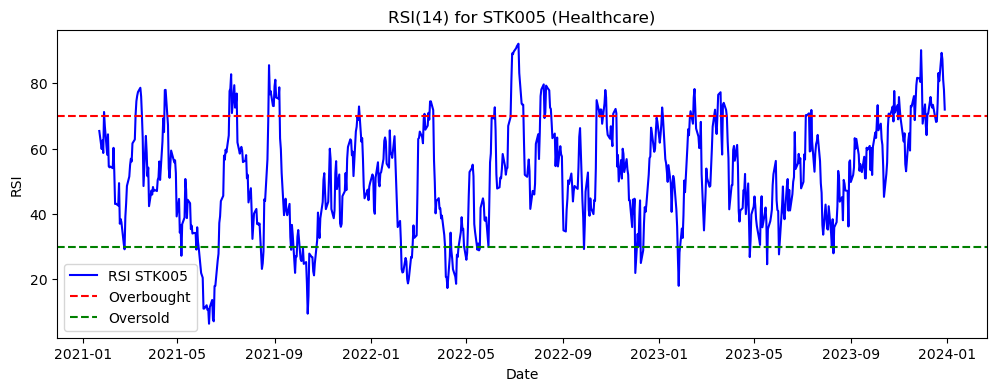

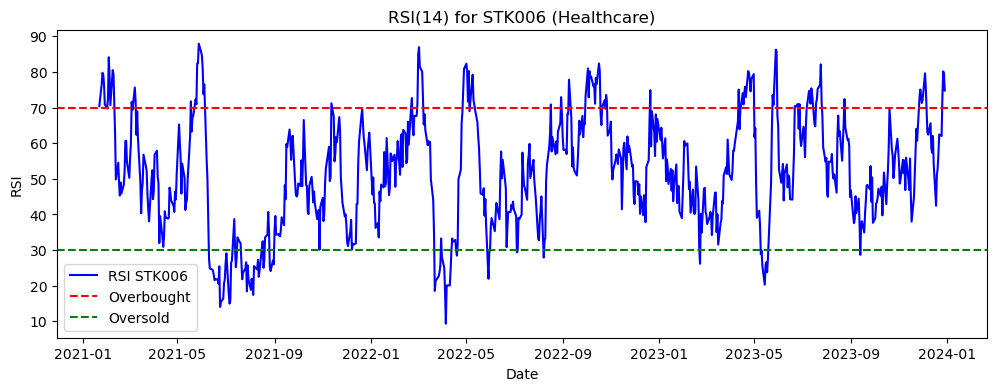

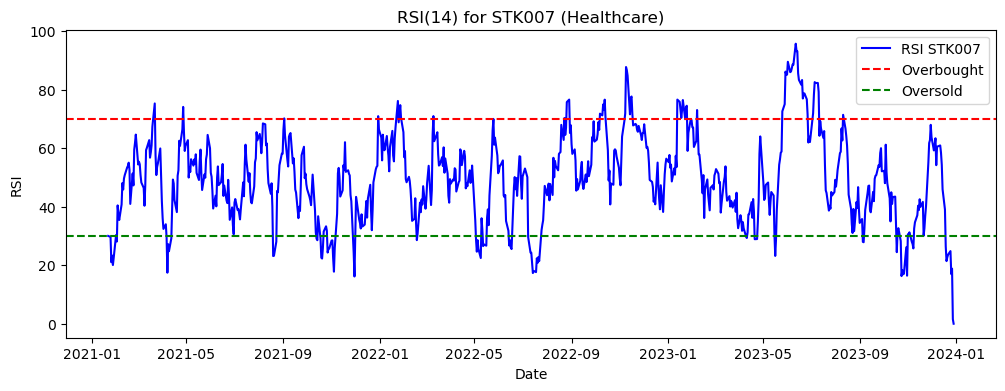

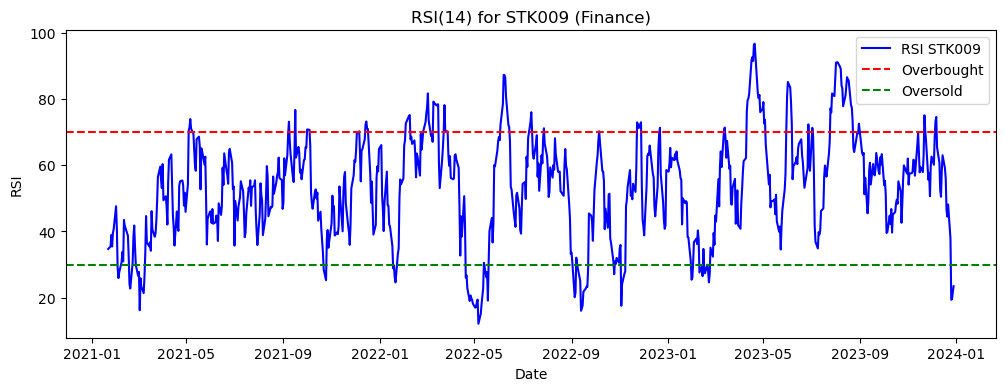

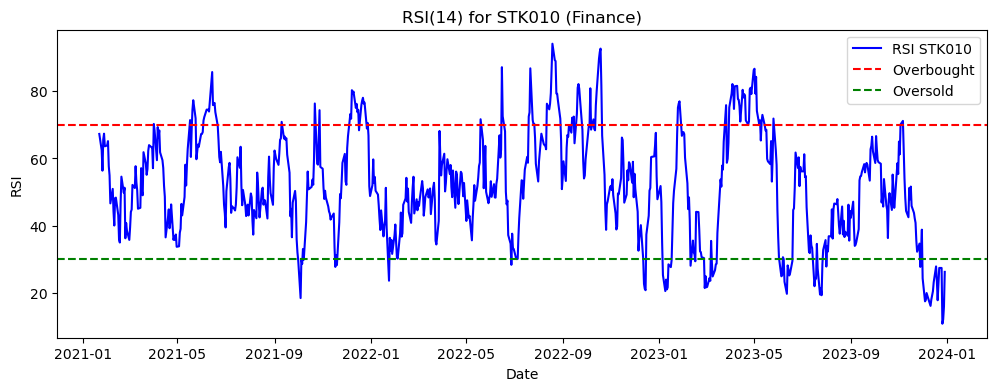

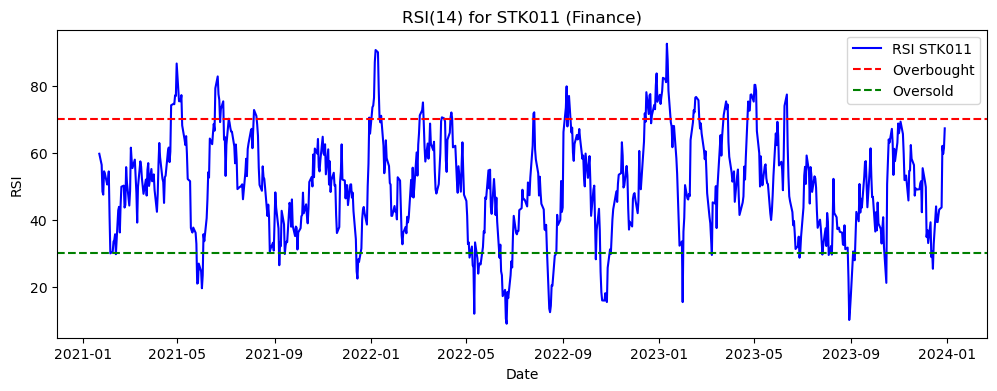

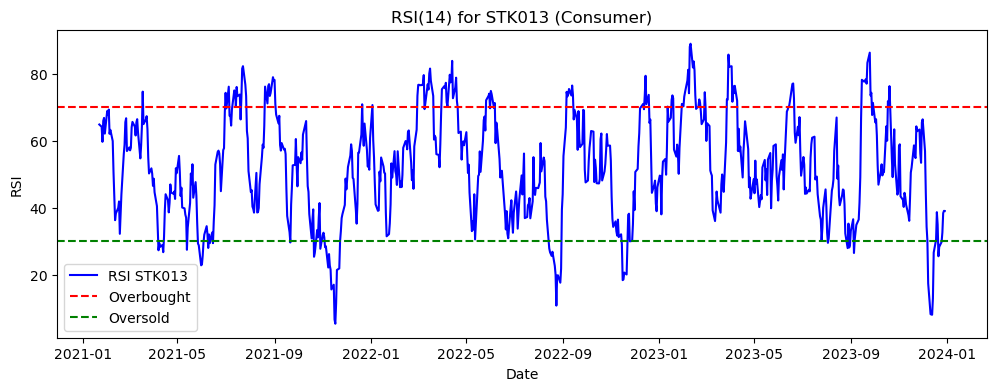

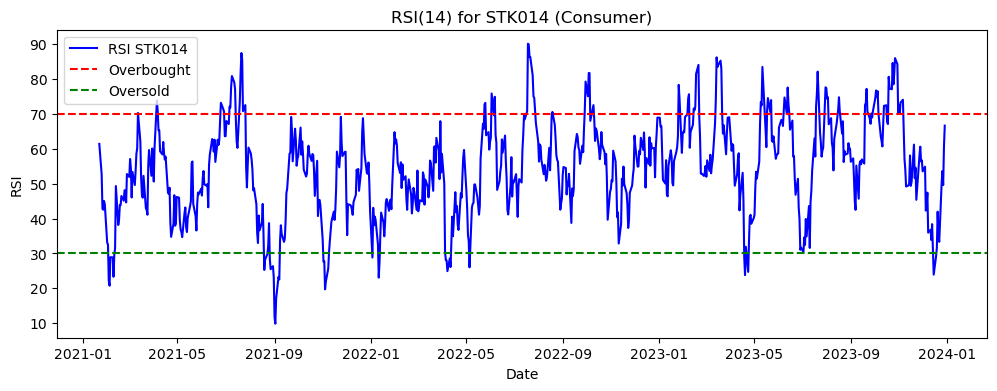

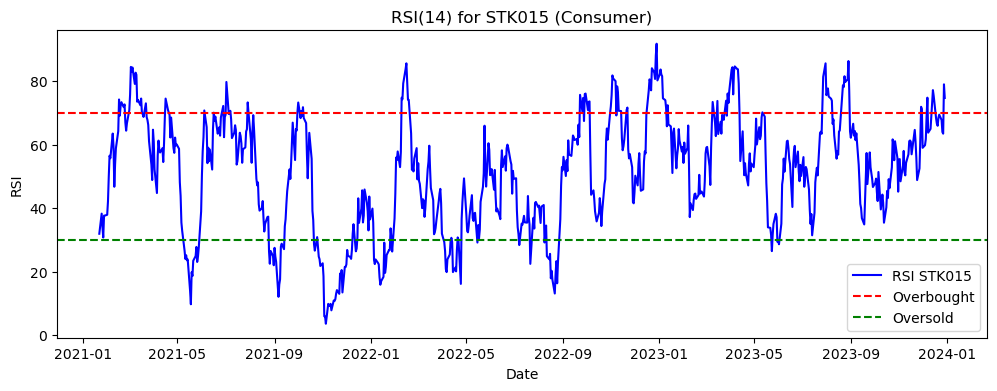

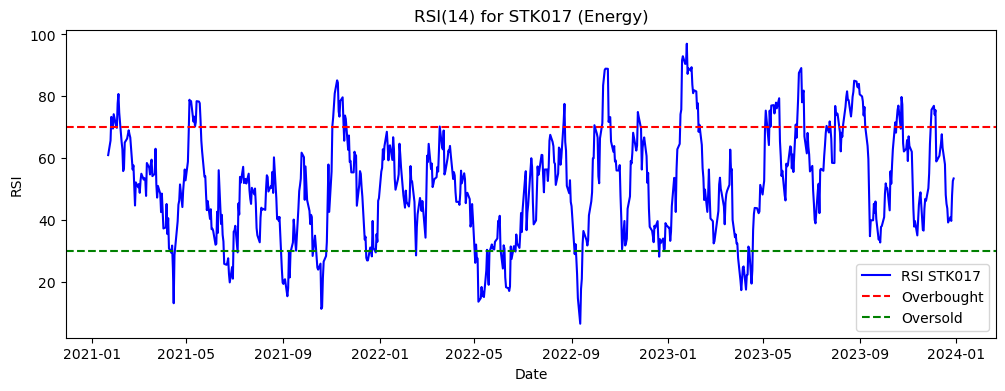

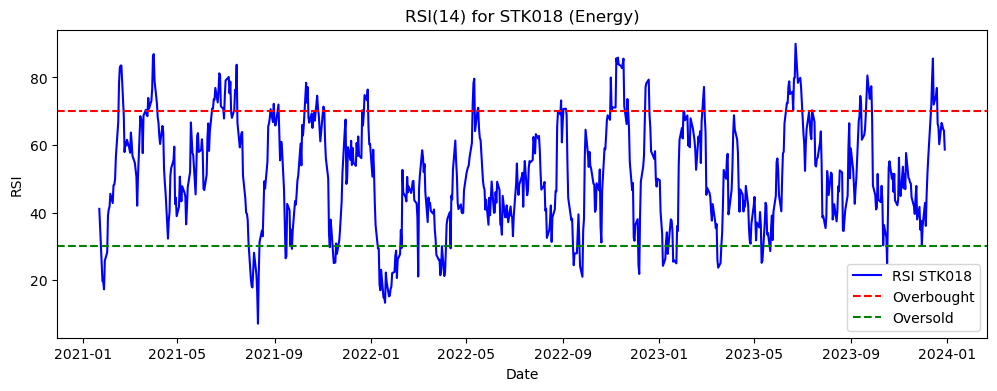

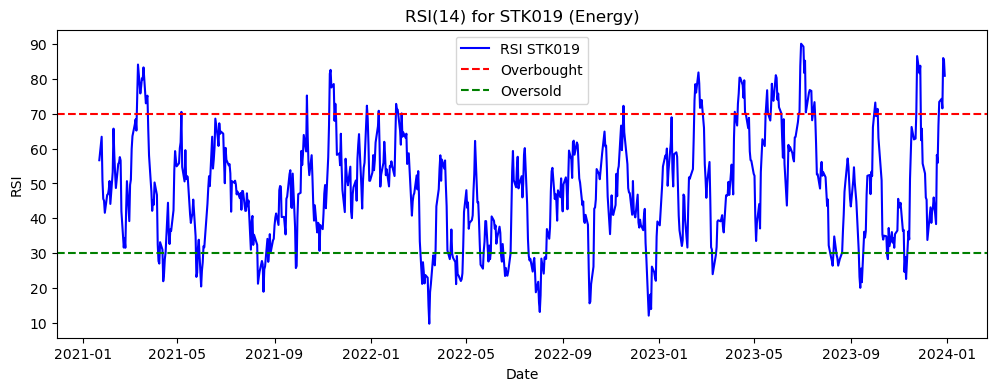

In [128]:

# --- RSI Visualization (Overbought/Oversold) ---

# Select three ticker per sector
sample_tickers = company_info.groupby('sector')['ticker'].head(3).values

for ticker in sample_tickers:
    df = stock_prices_indicators_aligned[stock_prices_indicators_aligned['ticker'] == ticker].copy()
    
     
    # Plot RSI
    plt.figure(figsize=(12,4))
    plt.plot(df['date'], df['rsi_14'], label=f'RSI {ticker}', color='blue')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title(f"RSI(14) for {ticker} ({company_info.loc[company_info['ticker']==ticker,'sector'].values[0]})")
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()
    
   

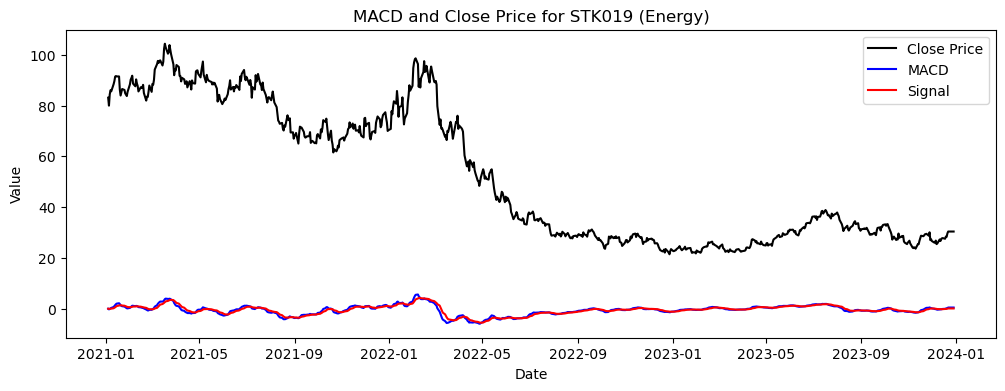

In [133]:
#Add MACD Signal columns
# Select three ticker per sector
sample_tickers = company_info.groupby('sector')['ticker'].head(3).values

for ticker in sample_tickers:
    df = stock_prices_indicators_aligned[stock_prices_indicators_aligned['ticker'] == ticker].copy()
    
# Compute MACD 
if 'macd' not in df.columns:
    ema_12 = df['close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['close'].ewm(span=26, adjust=False).mean()
    df['macd'] = ema_12 - ema_26
    df['macd_signal'] = df['macd'].ewm(span=9, adjust=False).mean()
   
# Plot MACD and price
plt.figure(figsize=(12,4))
plt.plot(df['date'], df['close'], label='Close Price', color='black')
plt.plot(df['date'], df['macd'], label='MACD', color='blue')
plt.plot(df['date'], df['macd_signal'], label='Signal', color='red')
plt.title(f"MACD and Close Price for {ticker} ({company_info.loc[company_info['ticker']==ticker,'sector'].values[0]})")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

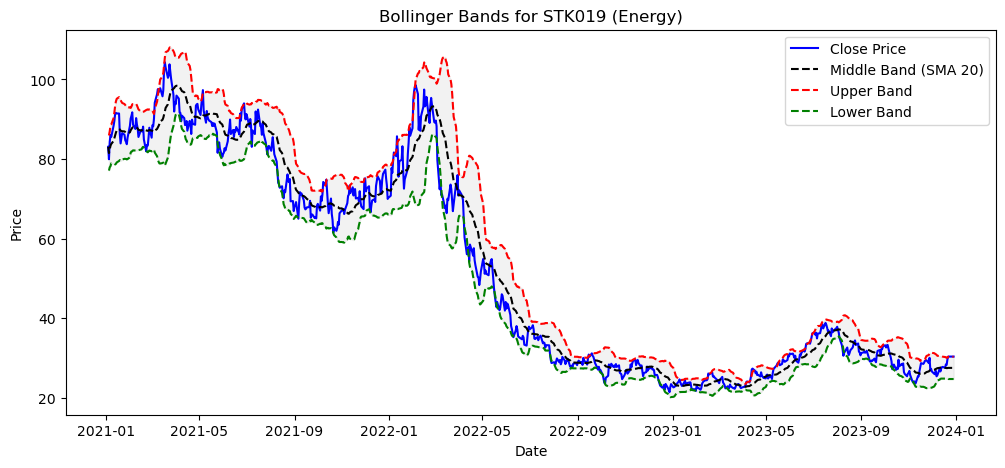

In [134]:
# Bollinger Band patterns
# Select three ticker per sector
sample_tickers = company_info.groupby('sector')['ticker'].head(3).values

for ticker in sample_tickers:
    df = stock_prices_indicators_aligned[stock_prices_indicators_aligned['ticker'] == ticker].copy()
    
# Compute Bollinger Bands 
if not {'bb_middle', 'bb_upper', 'bb_lower'}.issubset(df.columns):
    df['bb_middle'] = df['close'].rolling(20).mean()
    df['bb_std'] = df['close'].rolling(20).std()
    df['bb_upper'] = df['bb_middle'] + 2 * df['bb_std']
    df['bb_lower'] = df['bb_middle'] - 2 * df['bb_std']

# Plot
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['bb_middle'], label='Middle Band (SMA 20)', color='black', linestyle='--')
plt.plot(df['date'], df['bb_upper'], label='Upper Band', color='red', linestyle='--')
plt.plot(df['date'], df['bb_lower'], label='Lower Band', color='green', linestyle='--')
plt.fill_between(df['date'], df['bb_lower'], df['bb_upper'], color='grey', alpha=0.1)
    
plt.title(f"Bollinger Bands for {ticker} ({company_info.loc[company_info['ticker']==ticker,'sector'].values[0]})")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



#### Insight 
Price touching or exceeding the upper band indicate overbought conditions while crossing below the lower band suggests oversold levels.

The RSI(14) plot for the selected stock shows several peaks above 70, indicating overbought conditions followed by short-term price corrections. Occasional dips below 30 suggest oversold periods where the stock may have been undervalued before rebounding. Overall, the RSI pattern highlights alternating phases of buying and selling pressure, consistent with cyclical market behavior.

### Correlation Analysis:
1. Create correlation heatmap of selected features
2. Identify highly correlated features (potential multicollinearity)


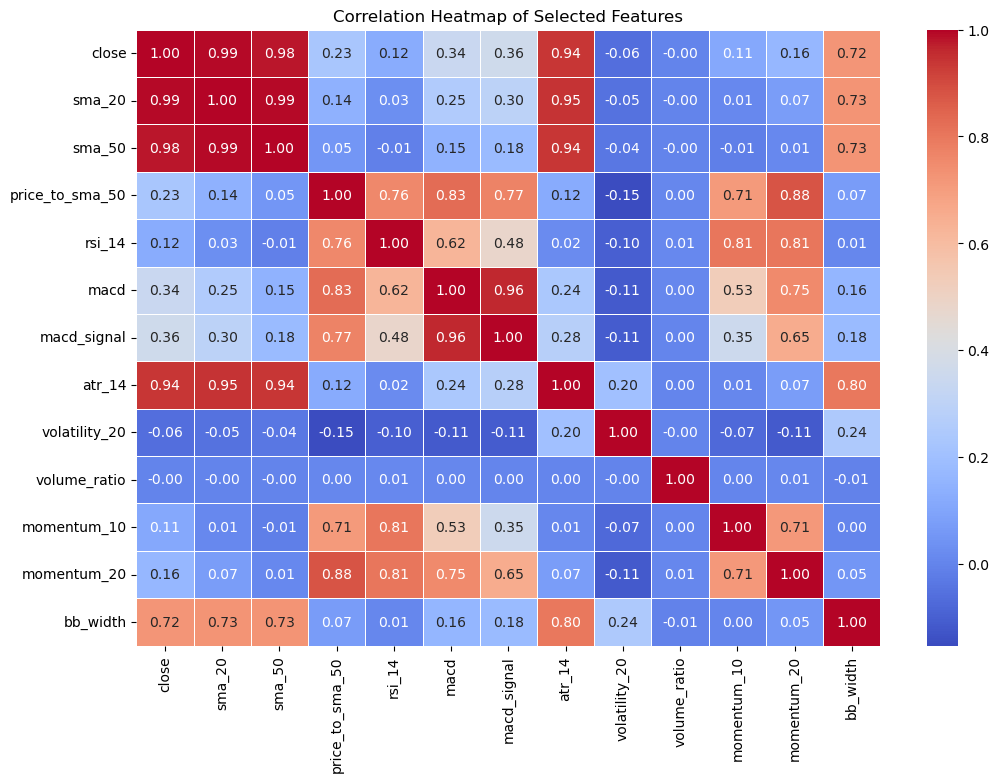

In [105]:
# correlation heatmap of selected features

# Select relevant numeric features for correlation analysis
features = [
    'close', 'sma_20', 'sma_50', 'price_to_sma_50', 
    'rsi_14', 'macd', 'macd_signal', 'atr_14', 'volatility_20', 
    'volume_ratio', 'momentum_10', 'momentum_20', 'bb_width'
]

corr_matrix = stock_prices_indicators_aligned[features].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


### Correlation Summary of Technical Features

Price and Moving Averages:
close, sma_20, and sma_50 are very highly correlated (>0.97), indicating they move together closely.
price_to_sma_50 has moderate correlation with rsi_14 (0.76) and macd (0.83), reflecting its relation to momentum indicators.

Momentum Indicators:
rsi_14 and momentum_10/20 show strong positive correlation (~0.80), confirming they capture similar price strength signals.
macd and macd_signal are extremely correlated (0.96), as expected from the MACD calculation.

Volatility Measures:
atr_14 correlates strongly with bb_width (0.80) and with price/MAs (~0.94), indicating that volatility increases with price movement magnitude.
volatility_20 has low correlations with most features except bb_width (0.24), showing it measures a slightly different aspect of price variability.

Volume and Returns:
volume_ratio shows nearly zero correlation with other features, suggesting volume-based signals are largely independent.

Bollinger Bands
bb_width is strongly correlated with atr_14 and moderately with close/MA features (~0.72), reflecting how bands widen during high volatility.

### Key Insights:
Features like close, sma_20, and sma_50 are redundant, so including all in a model may cause multicollinearity.
Momentum indicators (rsi_14, momentum_10/20, macd) are highly correlated; you might select 1–2 for modeling.
Volume (volume_ratio) is independent, adding a unique dimension to predictive models.
Volatility indicators (atr_14, bb_width) capture similar information, but volatility_20 is complementary.

## Feature Selection & Data Preparation

In [115]:
# Initialize OBV column as float
stock_prices_indicators_aligned['obv'] = 0.0

for ticker, group in stock_prices_indicators_aligned.groupby('ticker'):
    obv = [0.0]  # start as float
    for i in range(1, len(group)):
        if group['close'].iloc[i] > group['close'].iloc[i-1]:
            obv.append(obv[-1] + float(group['volume'].iloc[i]))
        elif group['close'].iloc[i] < group['close'].iloc[i-1]:
            obv.append(obv[-1] - float(group['volume'].iloc[i]))
        else:
            obv.append(obv[-1])
    # Cast to float array before assignment
    stock_prices_indicators_aligned.loc[group.index, 'obv'] = np.array(obv, dtype=float)


In [116]:
## Add bb_position
stock_prices_indicators_aligned['bb_position'] = (
    (stock_prices_indicators_aligned['close'] - stock_prices_indicators_aligned['bb_lower']) /
    (stock_prices_indicators_aligned['bb_upper'] - stock_prices_indicators_aligned['bb_lower'])
)


In [118]:
period = 14

# Compute Stochastic %K per ticker
stock_prices_indicators_aligned['stochastic_k'] = (
    (stock_prices_indicators_aligned['close'] - 
     stock_prices_indicators_aligned.groupby('ticker')['low'].transform(lambda x: x.rolling(period).min())) /
    (stock_prices_indicators_aligned.groupby('ticker')['high'].transform(lambda x: x.rolling(period).max()) -
     stock_prices_indicators_aligned.groupby('ticker')['low'].transform(lambda x: x.rolling(period).min()))
)


In [122]:
# --- 1. Select Features ---
selected_features = [
    'momentum_10', 'momentum_20',       # Price Momentum
    'sma_20', 'sma_50', 'price_to_sma_50',  # Moving Averages
    'rsi_14', 'macd', 'macd_signal',    # Momentum Indicators
    'atr_14', 'volatility_20', 'bb_width',  # Volatility
    'volume_ratio', 'obv',    # Volume
    'bb_position', 'stochastic_k'   #Position
    
]

target = 'trend_label'

# Include 'date' in selected columns for temporal split
modeling_df = stock_prices_indicators_aligned[['date'] + selected_features + [target]].copy()


In [123]:
# --- Handle Missing Values ---
modeling_df.ffill(inplace=True)
modeling_df.bfill(inplace=True)
modeling_df.dropna(subset=[target], inplace=True)

modeling_df.head()

,date,momentum_10,momentum_20,sma_20,sma_50,price_to_sma_50,rsi_14,macd,macd_signal,atr_14,volatility_20,bb_width,volume_ratio,obv,bb_position,stochastic_k,trend_label
0,2021-01-04,-0.008557,-0.045594,160.110000,160.110000,0.000000,100.000000,0.000000,0.000000,2.880,0.012463,6.363961,1.000000,0.0,0.676777,0.088026,Uptrend
1,2021-01-05,-0.008557,-0.045594,161.235000,161.235000,0.006977,100.000000,0.179487,0.035897,4.135,0.012463,6.363961,1.153842,1312685.0,0.676777,0.088026,Sideways
2,2021-01-06,-0.008557,-0.045594,161.416667,161.416667,0.002251,79.505300,0.271798,0.083078,3.280,0.012463,4.672701,1.167277,-136492.0,0.577757,0.088026,Sideways
3,2021-01-07,-0.008557,-0.045594,162.830000,162.830000,0.026039,92.857143,0.763018,0.219066,3.990,0.018138,11.933013,1.167320,1398341.0,0.855317,0.088026,Downtrend
4,2021-01-08,-0.008557,-0.045594,163.400000,163.400000,0.013953,79.284963,1.028298,0.380912,4.008,0.018663,11.523437,0.694431,550080.0,0.697858,0.088026,Downtrend


In [124]:
# --- Train-Test Split (temporal) ---
modeling_df = modeling_df.sort_values('date')  # now 'date' exists

split_idx = int(len(modeling_df) * 0.7)
train_df = modeling_df.iloc[:split_idx]
test_df = modeling_df.iloc[split_idx:]

print(f"Training set: {train_df.shape[0]} rows")
print(f"Test set: {test_df.shape[0]} rows")
print(f"Features: {selected_features}")


Training set: 10920 rows
Test set: 4680 rows
Features: ['momentum_10', 'momentum_20', 'sma_20', 'sma_50', 'price_to_sma_50', 'rsi_14', 'macd', 'macd_signal', 'atr_14', 'volatility_20', 'bb_width', 'volume_ratio', 'obv', 'bb_position', 'stochastic_k']
